In [19]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [20]:
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

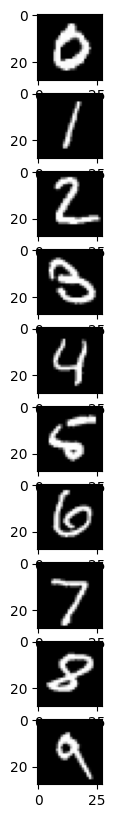

In [21]:
x_test_sample = []

for digit in range(10):
    for i in range(len(x_test_full)):
        if y_test_full[i] == digit:
            x_test_sample.append(x_test_full[i])
            break

plt.figure(figsize=(10, 10)) 
for i in range(10):
    plt.subplot(10,1,i+1)
    plt.imshow(x_test_sample[i], cmap='gray')


In [22]:
model_zero = models.load_model('new_10_9_24_0052.keras')
model_one = models.load_model('new_one_10_9_24_0052.keras')


c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [24]:
for i in range(10):
    x_test_image = np.expand_dims(x_test_sample[i], axis=-1) # 28x28x1
    x_test_image = np.expand_dims(x_test_image, axis=0)   #1[batchsize]x28x28x1
   
    predictions_zero = model_zero.predict(x_test_image, verbose=0)
    predictions_one = model_one.predict(x_test_image, verbose=0)
    print(i,predictions_zero,predictions_one)

0 [[0.9999451]] [[0.08522332]]
1 [[0.08583948]] [[0.99997634]]
2 [[0.08583948]] [[0.08522332]]
3 [[0.08583948]] [[0.08522332]]
4 [[0.08583948]] [[0.08522332]]
5 [[0.08583948]] [[0.08522332]]
6 [[0.60377467]] [[0.08522332]]
7 [[0.08583948]] [[0.08522332]]
8 [[0.08583948]] [[0.08522332]]
9 [[0.08583948]] [[0.08522332]]


In [30]:
weights = model_zero.get_weights()  
file_path = './ZeroModelWeightsTraining/AfterEpoch10/Layer_0.npz'
data = np.load(file_path)
data_keys = data.files
weights_zero = data['arr_0']
print(weights_zero)
assert np.array_equal(weights[0], weights_zero),"not same weights"
"same weights"


[[[[ 0.44283348]]

  [[-0.16136795]]

  [[-0.26256523]]]


 [[[ 0.20831099]]

  [[-0.20640174]]

  [[ 0.52380574]]]


 [[[ 0.39053124]]

  [[-0.12946358]]

  [[-0.17096186]]]]


'same weights'

In [31]:
weights = model_one.get_weights()  
file_path = './OneModelWeightsTraining/AfterEpoch10/Layer_0.npz'
data = np.load(file_path)
data_keys = data.files
weights_one = data['arr_0']
print(weights_one)
assert np.array_equal(weights[0], weights_one),"not same weights"
"same weights"


[[[[ 0.49434558]]

  [[-0.13059205]]

  [[-0.29330567]]]


 [[[ 0.16579343]]

  [[-0.23465042]]

  [[ 0.4890463 ]]]


 [[[ 0.33473533]]

  [[-0.20605555]]

  [[-0.29760316]]]]


'same weights'

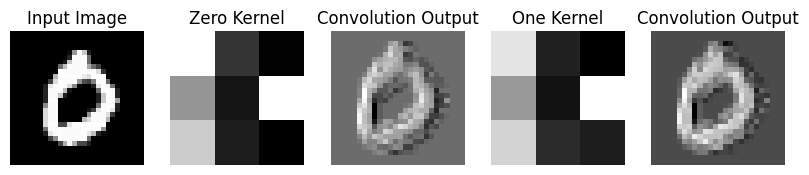

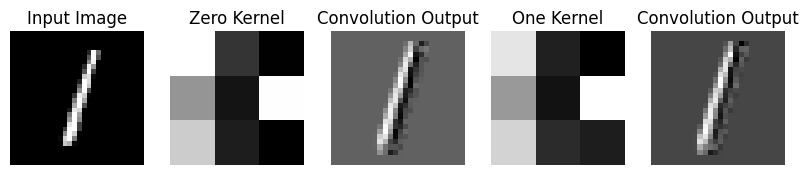

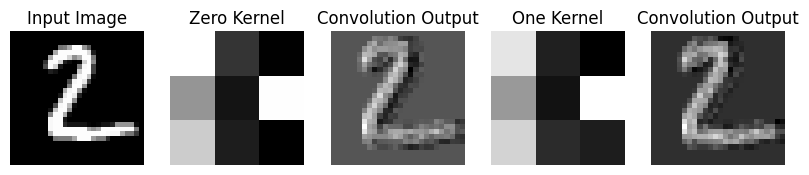

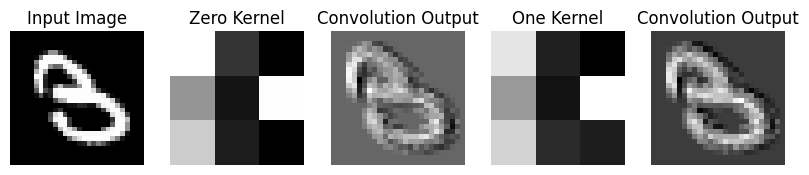

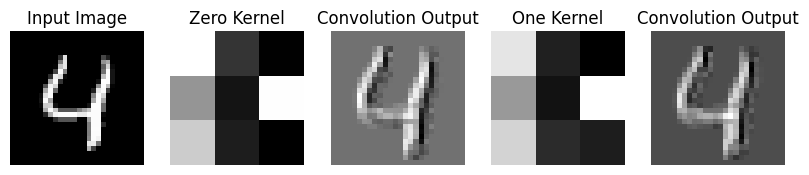

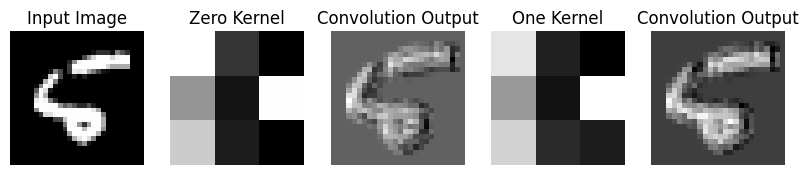

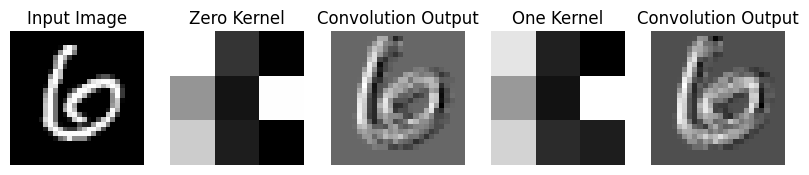

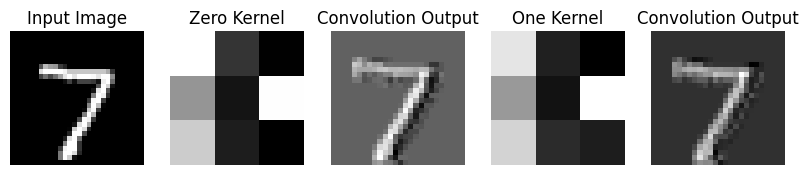

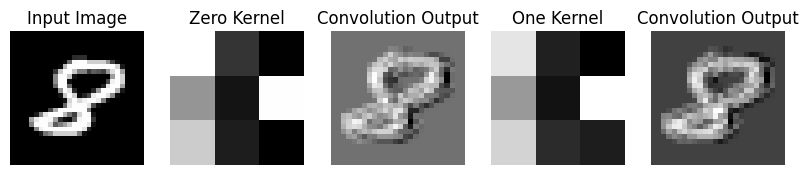

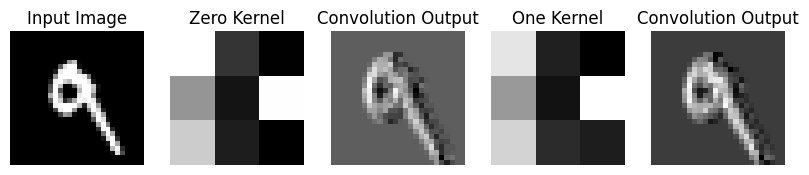

In [35]:
kernel_0=weights_one.reshape(3,3)
kernel_1=weights_zero.reshape(3,3)

for i in range(10):
    image = x_test_sample[i]
    output_0 = convolve2d(image, kernel_0, mode='valid')
    output_1 = convolve2d(image, kernel_1, mode='valid')

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 5, 1)
    plt.title("Input Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.title("Zero Kernel")
    plt.imshow(kernel_0, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 5, 3)
    plt.title("Convolution Output")
    plt.imshow(output_0, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.title("One Kernel")
    plt.imshow(kernel_1, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 5, 5)
    plt.title("Convolution Output")
    plt.imshow(output_1, cmap='gray')
    plt.axis('off')
    plt.show()
